In [1]:
import torch
import torchvision
import torchvision.transforms as transforms

In [10]:
import json

# Define the path to the COCO JSON file
coco_json_file = "mvpDataset/mvpDataset.json"

# Load the COCO JSON file
with open(coco_json_file, "r") as f:
    coco_data = json.load(f)

# Create a mapping for the new category IDs
category_id_mapping = {category["id"]: idx + 1 for idx, category in enumerate(coco_data["categories"])}

# Update the category IDs
for category in coco_data["categories"]:
    category["id"] = category_id_mapping[category["id"]]

# Update the category IDs in the annotations
for annotation in coco_data["annotations"]:
    try:
        annotation["category_id"] = category_id_mapping[annotation["category_id"]]
    except KeyError:
        print(f"Warning: Category ID {annotation['category_id']} not found in the category list.")

# Save the updated COCO JSON file
with open("updated_mvpDataset.json", "w") as f:
    json.dump(coco_data, f, indent=2)


In [7]:
import fiftyone as fo

#load a dataset inside the dataset1 directory the data is of type coco
dataset = fo.Dataset.from_dir(
    r"C:\Users\thoma\Documents\Github\Foocus-Logodetection\mvpDataset",
    fo.types.COCODetectionDataset,
    label_field="ground_truth",
    annotation_path="labels.json"  # Add this line

)

session = fo.launch_app(dataset)

Ignoring unsupported parameter 'annotation_path' for importer type <class 'fiftyone.utils.coco.COCODetectionDatasetImporter'>
 100% |███████████████| 2425/2425 [21.6s elapsed, 0s remaining, 119.2 samples/s]      


In [13]:
taining_dataset = fo.Dataset.from_dir(
    r"C:\Users\thoma\Documents\Github\Foocus-Logodetection\dataset",
    fo.types.COCODetectionDataset,
    label_field="ground_truth",
    annotation_path="train.json"  # Add this line
)

session = fo.launch_app(taining_dataset)

Ignoring unsupported parameter 'annotation_path' for importer type <class 'fiftyone.utils.coco.COCODetectionDatasetImporter'>
 100% |███████████████| 1494/1494 [6.6s elapsed, 0s remaining, 450.2 samples/s]       


Ignoring unsupported parameter 'annotation_path' for importer type <class 'fiftyone.utils.coco.COCODetectionDatasetImporter'>
 100% |███████████████| 1494/1494 [7.3s elapsed, 0s remaining, 428.3 samples/s]       



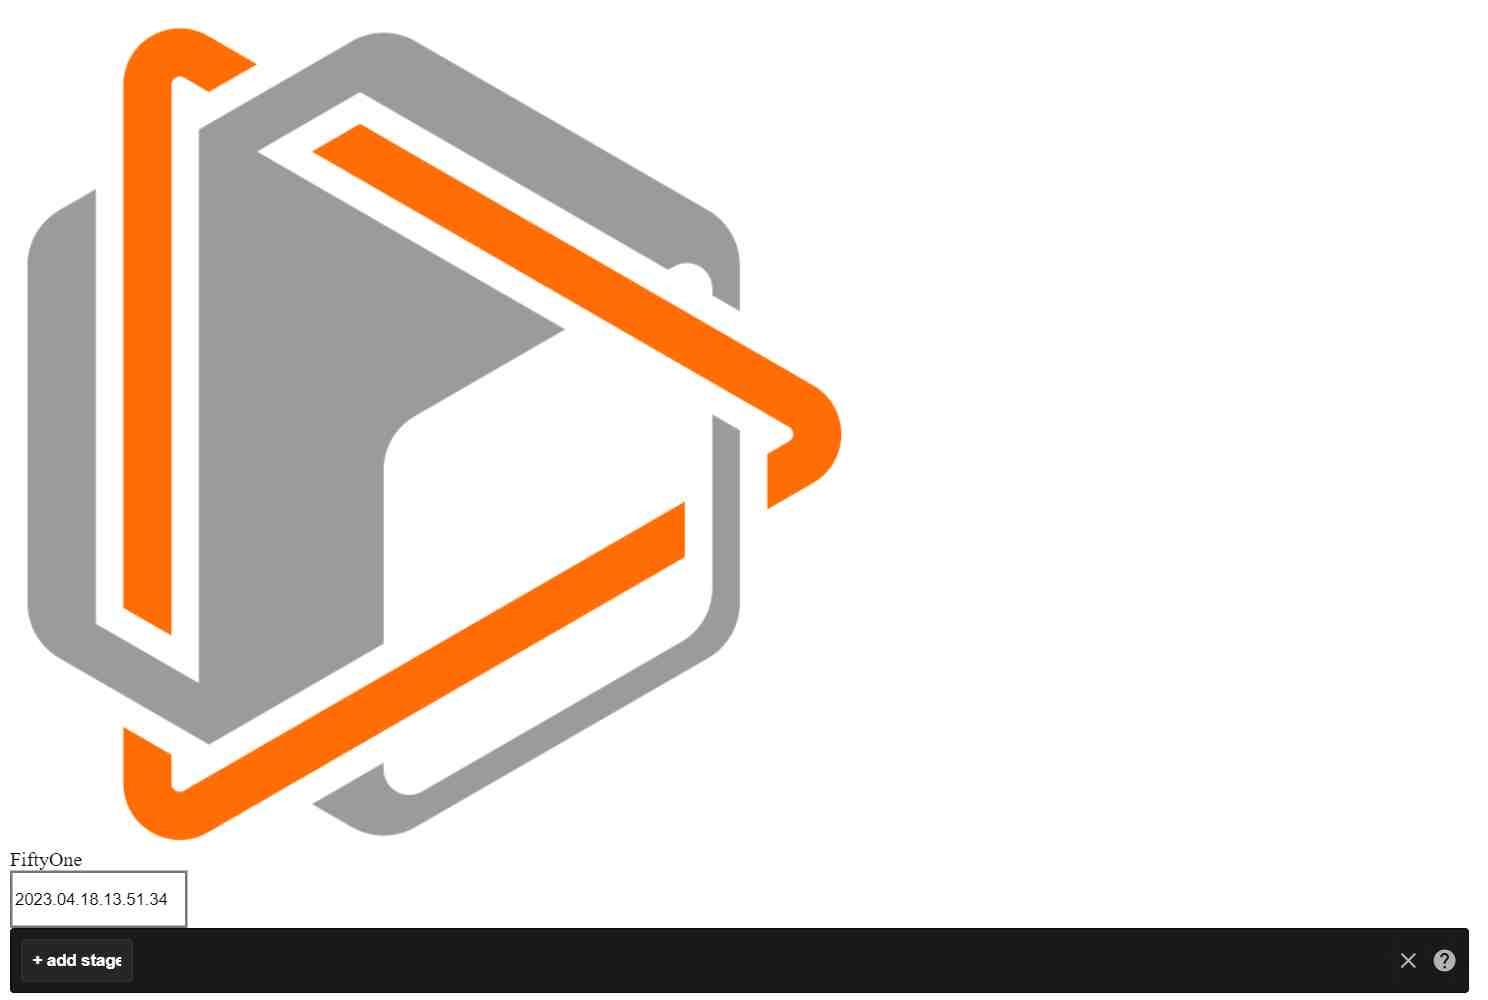

In [3]:
testing_dataset = fo.Dataset.from_dir(
    r"C:\Users\thoma\Documents\Github\Foocus-Logodetection\dataset",
    fo.types.COCODetectionDataset,
    label_field="ground_truth",
    annotation_path="mvpDataset.json"  # Add this line
)

session = fo.launch_app(testing_dataset)

In [4]:
from torchvision.models import resnet50, ResNet50_Weights
resnet50(weights=ResNet50_Weights.DEFAULT)


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [5]:
weights=ResNet50_Weights.DEFAULT
model = resnet50(weights=weights)

model.eval()


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 